In [7]:
import polars as pl

# 读取数据
data = pl.read_parquet("hourly_data.pa")

# 排序数据
df = data.sort('open_time').sort("symbol")

# 计算每个时刻的价格变动
df = df.with_columns([
    (pl.col("close") - pl.col("open")).alias("price_change"),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

# 计算价格变动与成交量的比率
df = df.with_columns([
    (pl.col("price_change") / pl.col("volume")).alias("price_change_volume_ratio")
])

print(df)

shape: (2_483_434, 15)
┌─────────────┬────────┬────────┬────────┬───┬─────────────┬─────────────┬───────────┬─────────────┐
│ open_time   ┆ open   ┆ high   ┆ low    ┆ … ┆ symbol      ┆ price_chang ┆ return    ┆ price_chang │
│ ---         ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---         ┆ e           ┆ ---       ┆ e_volume_ra │
│ datetime[μs ┆ f64    ┆ f64    ┆ f64    ┆   ┆ str         ┆ ---         ┆ f64       ┆ tio         │
│ ]           ┆        ┆        ┆        ┆   ┆             ┆ f64         ┆           ┆ ---         │
│             ┆        ┆        ┆        ┆   ┆             ┆             ┆           ┆ f64         │
╞═════════════╪════════╪════════╪════════╪═══╪═════════════╪═════════════╪═══════════╪═════════════╡
│ 2022-09-09  ┆ 0.4728 ┆ 0.4874 ┆ 0.3663 ┆ … ┆ 1000LUNCUSD ┆ -0.0218     ┆ null      ┆ -3.3178e-10 │
│ 13:00:00    ┆        ┆        ┆        ┆   ┆ T           ┆             ┆           ┆             │
│ 2022-09-09  ┆ 0.451  ┆ 0.4609 ┆ 0.4277 ┆ … ┆ 1000LUNCUSD ┆ 0.0082 

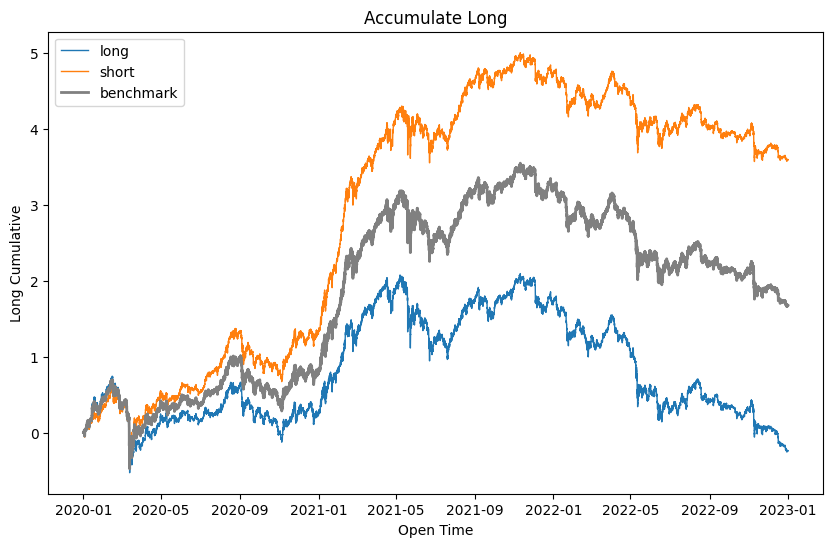

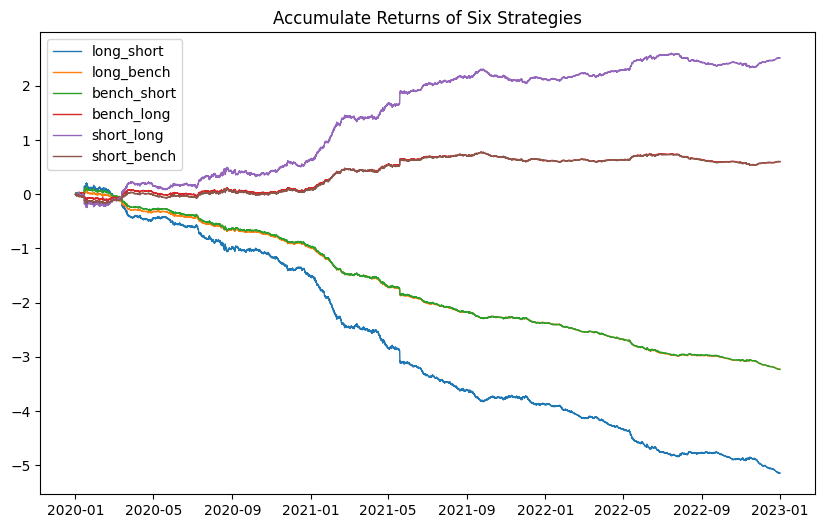

long: 
ann_return = -0.0796  sharpe = -0.0721  maxdd = 0.7573  calmar_ratio = -0.1051  

short: 
ann_return = 1.196  sharpe = 1.1007  maxdd = 0.6673  calmar_ratio = 1.7924  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.7136  sharpe = -6.0758  maxdd = 4.4383  calmar_ratio = -0.3861  

long_bench: 
ann_return = -1.0751  sharpe = -7.5768  maxdd = 3.1035  calmar_ratio = -0.3464  

bench_long: 
ann_return = 0.1991  sharpe = 1.4033  maxdd = 0.1426  calmar_ratio = 1.3964  

short_long: 
ann_return = 0.8376  sharpe = 2.9698  maxdd = 0.2669  calmar_ratio = 3.1378  

short_bench: 
ann_return = 0.2005  sharpe = 1.4062  maxdd = 0.167  calmar_ratio = 1.2008  

bench_short: 
ann_return = -1.0765  sharpe = -7.5503  maxdd = 2.9801  calmar_ratio = -0.3612  



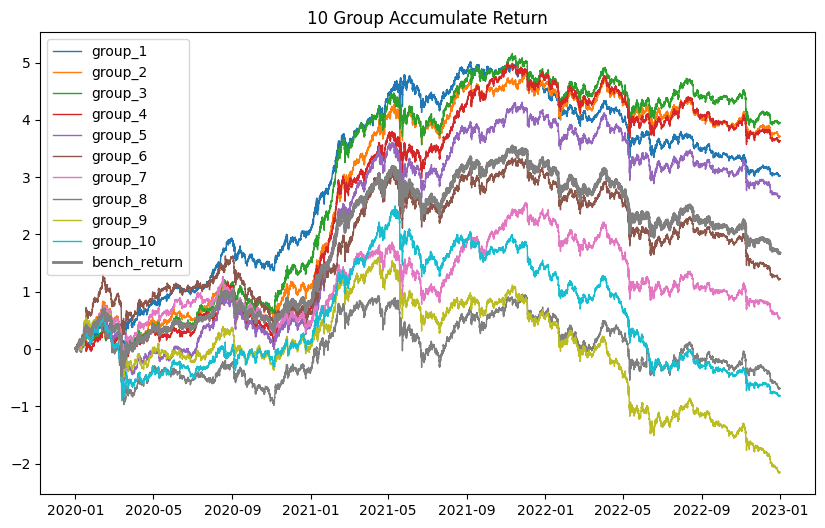

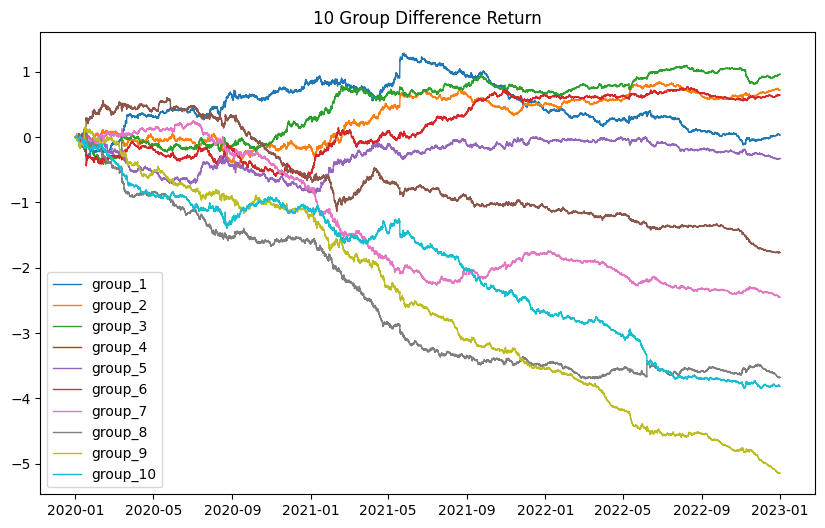

group_1: 
ann_return = 1.0055  sharpe = 0.97  maxdd = 0.5805  calmar_ratio = 1.7321  

group_2: 
ann_return = 1.2357  sharpe = 1.107  maxdd = 0.6706  calmar_ratio = 1.8427  

group_3: 
ann_return = 1.3156  sharpe = 1.153  maxdd = 0.6651  calmar_ratio = 1.978  

group_4: 
ann_return = 1.2095  sharpe = 1.0271  maxdd = 0.8098  calmar_ratio = 1.4936  

group_5: 
ann_return = 0.8859  sharpe = 0.7428  maxdd = 0.7951  calmar_ratio = 1.1141  

group_6: 
ann_return = 0.4066  sharpe = 0.3402  maxdd = 0.5464  calmar_ratio = 0.7441  

group_7: 
ann_return = 0.179  sharpe = 0.152  maxdd = 0.5991  calmar_ratio = 0.2988  

group_8: 
ann_return = -0.2297  sharpe = -0.1973  maxdd = 0.9889  calmar_ratio = -0.2322  

group_9: 
ann_return = -0.7167  sharpe = -0.6205  maxdd = 1.449  calmar_ratio = -0.4946  

group_10: 
ann_return = -0.2742  sharpe = -0.2496  maxdd = 0.9499  calmar_ratio = -0.2886  

-----------------------------------------
group_difference_1: 
ann_return = 0.01  sharpe = 0.0274  maxdd = 0

In [8]:
factors = df.select(['open_time', 'symbol', 'price_change_volume_ratio'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()